In [12]:
%matplotlib inline

import math
import time
import glob
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.stats import beta
from scipy.ndimage.interpolation import shift
import seaborn as sns

In [15]:
print("numpy version:", np.__version__)
print("scipy version:", scipy.__version__)

numpy version: 1.16.4
scipy version: 1.2.1


In [2]:
from pathlib import Path

commondir = './simresults/KS_Simulations/'
Path(commondir).mkdir(parents=True, exist_ok=True)

In [7]:
# Number of simulations
numberSimulation = 20000

# History length
historyLenRange = range(100, 1050, 50)

thresholdRange = range(90, 100, 2)

debug = False

In [3]:
results = {'HL': [],'TH': [], 'P': [],'N': [],
           'TP': [], 'TN': [], 'FP': [], 'FN': [],
           'TPRate': [], 'TNRate': [], 'FPRate': [], 'FNRate': []}
for count in range(50):
    for threshold in thresholdRange:
        threshold = threshold / 100
        print("Threshold:", threshold)
        for historyLen in historyLenRange:
            #print("   historyLen:", historyLen)
            pvalues = []
            for i in range(numberSimulation):
                # Draw samples from a uniform distribution.
                # Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high).
                s = np.random.uniform(low=0, high=1, size=historyLen)
                ks = stats.kstest(s, 'uniform')
                pvalues.append(ks)

            df = pd.DataFrame(data=pvalues)
            timestr = time.strftime("%Y%m%d-%H%M%S")
            file_name = 'KS-Rst-{0}-{1}-{2}.csv'.format(str(threshold), str(historyLen), timestr)
            full_path = os.path.join(commondir, file_name)
            df.to_csv(full_path, index=False)

            TP = len(df[df.pvalue < threshold])
            FN = len(df[df.pvalue >= threshold])
            if debug:
                print("      False negative:", (FN))
                print("      True positive:", (TP))
                assert (numberSimulation == FN + TP), "The number of simulations does not match!"
                print("      Threshold:", threshold)
                print("      False negative rate:", (FN/numberSimulation))
                print("      True positive rate:", (TP/numberSimulation))
            results['HL'].append(historyLen)
            results['TH'].append(threshold)
            results['P'].append(numberSimulation)
            results['N'].append(0)
            results['TP'].append(TP)
            results['TN'].append(0)
            results['FP'].append(0)
            results['FN'].append(FN)
            results['TPRate'].append(TP/numberSimulation)
            results['TNRate'].append(0)
            results['FPRate'].append(0)
            results['FNRate'].append(FN/numberSimulation)
        
            #timestr = time.strftime("%Y%m%d-%H%M%S")
            #file_name = 'KSPartialRst-{0}-{1}-{2}.csv'.format(str(threshold), str(historyLen), timestr)
            #full_path = os.path.join(commondir, file_name)
            #df.to_csv(full_path, index=False)
            
df = pd.DataFrame(data=results)

Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98
Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Thres

In [8]:
results = {'HL': [],'TH': [], 'P': [],'N': [],
           'TP': [], 'TN': [], 'FP': [], 'FN': [],
           'TPRate': [], 'TNRate': [], 'FPRate': [], 'FNRate': []}
for threshold in thresholdRange:
    threshold = threshold / 100
    print("Threshold:", threshold)
    for historyLen in historyLenRange:
        #print("   historyLen:", historyLen)
        file_name = 'KS-Rst-{0}-{1}-{2}.csv'.format(str(threshold), str(historyLen), "*")
        search_path = os.path.join(commondir, file_name)
        frames = []
        for fname in glob.glob(search_path):
            #print("Reading file ", fname," using threshold =", threshold, " and historyLen =", historyLen)
            tmpdf = pd.read_csv(fname)
            frames.append(tmpdf)
        
        dfTmp = pd.concat(frames, ignore_index=True)
        numberSimulation = dfTmp.shape[0]
        TP = len(dfTmp[dfTmp.pvalue < threshold])
        FN = len(dfTmp[dfTmp.pvalue >= threshold])
        if debug:
            print("      False negative:", (FN))
            print("      True positive:", (TP))
            assert (numberSimulation == FN + TP), "The number of simulations does not match!"
            print("      Threshold:", threshold)
            print("      False negative rate:", (FN/numberSimulation))
            print("      True positive rate:", (TP/numberSimulation))
        results['HL'].append(historyLen)
        results['TH'].append(threshold)
        results['P'].append(numberSimulation)
        results['N'].append(0)
        results['TP'].append(TP)
        results['TN'].append(0)
        results['FP'].append(0)
        results['FN'].append(FN)
        results['TPRate'].append(TP/numberSimulation)
        results['TNRate'].append(0)
        results['FPRate'].append(0)
        results['FNRate'].append(FN/numberSimulation)
        
df = pd.DataFrame(data=results)

Threshold: 0.9
Threshold: 0.92
Threshold: 0.94
Threshold: 0.96
Threshold: 0.98


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\AgustinSantos\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-75c4c7049ced>", line 14, in <module>
    tmpdf = pd.read_csv(fname)
  File "C:\Users\AgustinSantos\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 702, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\AgustinSantos\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 429, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\AgustinSantos\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 895, in __init__
    self._make_engine(self.engine)
  File "C:\Users\AgustinSantos\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 1122, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "C:\Users\AgustinSantos\Anaconda3\lib\site-packages\pandas\io\parsers.py", line 1853

KeyboardInterrupt: 

In [ ]:
print(df.dtypes)
df.head(20)

In [28]:
threshold = 0.92
historyLen = 1000
#print("   historyLen:", historyLen)
file_name = 'KS-Rst-{0}-{1}-{2}.csv'.format(str(threshold), str(historyLen), "*")
search_path = os.path.join(commondir, file_name)
frames = []
for fname in glob.glob(search_path):
    #print("Reading file ", fname," using threshold =", threshold, " and historyLen =", historyLen)
    tmpdf = pd.read_csv(fname)
    frames.append(tmpdf)

dfTmp = pd.concat(frames, ignore_index=True)

In [13]:
print(dfTmp.shape)
dfTmp.head(20)

(1030000, 2)


,statistic,pvalue
0,0.067143,0.777121
1,0.060340,0.859747
2,0.085399,0.439749
3,0.077144,0.578396
4,0.063315,0.817586
5,0.095922,0.297961
6,0.095438,0.303638
7,0.074230,0.632994
8,0.081230,0.506766
9,0.114553,0.134024


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BB0487F400>]],
      dtype=object)

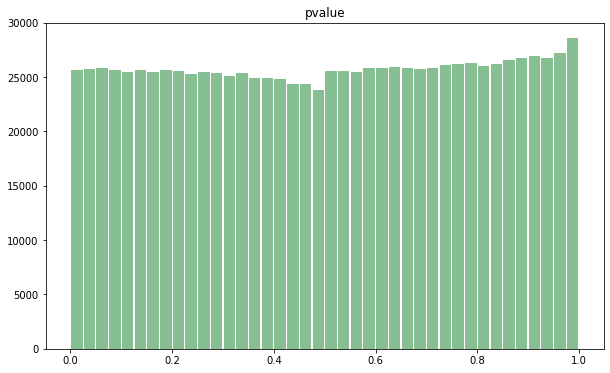

In [29]:
dfTmp.hist(column='pvalue', bins=40, grid=False, figsize=(10,6), color='#86bf91', zorder=2, rwidth=0.9)

In [4]:
df96 = df[df.TH == 0.96]
print(df96.shape)
df96.head(20)

NameError: name 'df' is not defined

In [ ]:
file_name = 'HonestSimulations.csv'
full_path = os.path.join(commondir, file_name)
df.to_csv(full_path, index=False)

In [ ]:
writer = pd.ExcelWriter(commondir + 'HonestSimulations.xlsx', engine='xlsxwriter')
df.to_excel(writer,index=False)
writer.save()

In [5]:
df96 = df[df.TH == 0.96]
df96.plot(kind='bar', x='HL', y='FNRate',color='red')
plt.show()

NameError: name 'df' is not defined

In [ ]:
threshold = 0.96
df96 = df[df.TH == threshold]
df96.plot(kind='bar', x='HL', y='FNRate',color='red')
#plt.show()
plt.title("False Negative Rate")
plt.xlabel("History Length")
plt.ylabel("False Negative Rate");
plt.legend()
plt.tight_layout()
plt.savefig(commondir + 'images/FNRate-{0}.pdf'.format(str(threshold)), format='pdf')

0.09999999999999998
0.07999999999999996
0.06000000000000005
0.040000000000000036
0.020000000000000018


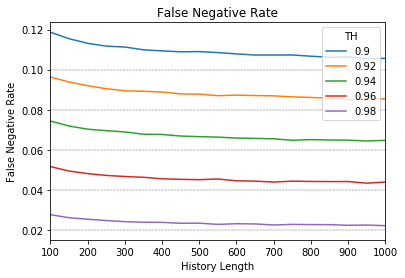

In [67]:
df['TH'] = df['TH'].astype(str)
df2 = df.pivot(index='HL', columns='TH', values='FNRate')
ax = df2.plot()
for p in (1 - df['TH'].unique().astype(float)):
    print(p)
    ax.hlines(y=p, xmin=100, xmax=1000, linewidth=0.3, linestyle='-.')
ax.set_title("False Negative Rate")
ax.set_xlabel("History Length")
ax.set_ylabel("False Negative Rate");

In [57]:
1 - df['TH'].unique().astype(float)

array([0.1 , 0.08, 0.06, 0.04, 0.02])